In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
img = cv2.imread('coins.jpg')

In [3]:
img.shape

(190, 265, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[253, 255, 249],
        [253, 255, 249],
        [253, 255, 249],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 255, 249],
        [253, 255, 249],
        [253, 255, 249],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 255, 249],
        [253, 255, 249],
        [253, 255, 249],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
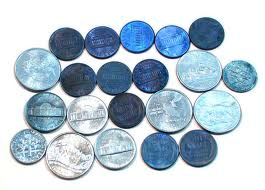

In [4]:
img

In [21]:
# Escala de grises, desenfoque Gaussiano y detección de bordes
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(gray,(5,5),0)
edges = cv2.Canny(gray_blurred, 100, 200)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [253, 253, 253, ..., 255, 255, 255],
       [253, 253, 253, ..., 255, 255, 255],
       [253, 253, 253, ..., 255, 255, 255]], dtype=uint8)
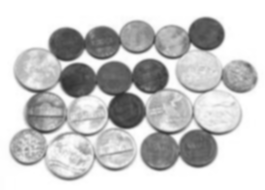

In [20]:
gray_blurred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
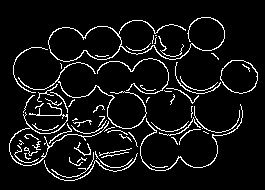

In [22]:
edges

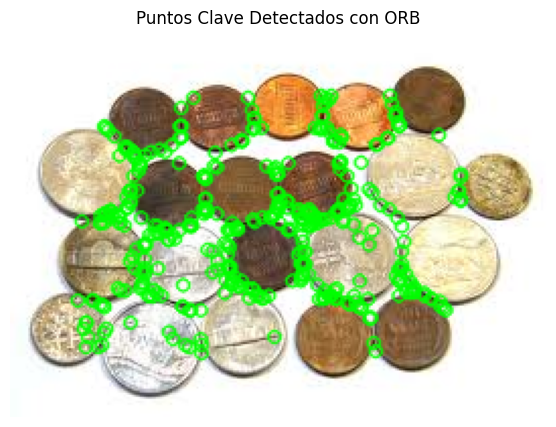

In [49]:
# Crear un detector ORB
orb = cv2.ORB_create()

# Detectar puntos clave y computar descriptores
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Dibujar los puntos clave detectados
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

# Mostrar la imagen con los puntos clave detectados
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Puntos Clave Detectados con ORB')
plt.axis('off')
plt.show()

In [43]:
detected_circles = cv2.HoughCircles(gray_blurred,
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)

In [44]:
img_circles = gray_blurred.copy()
detected_circles = np.uint16(np.around(detected_circles))

In [45]:
#Dibujar circulos
for pt in detected_circles[0, :]:
    a, b, r = pt[0], pt[1], pt[2]
    cv2.circle(img_circles, (a, b), r, (0, 255, 0), 2)
    cv2.circle(img_circles, (a, b), 1, (0, 0, 255), 3)

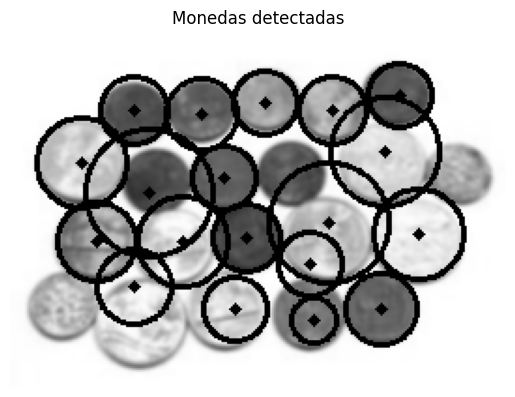

In [48]:
plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
plt.title('Monedas detectadas')
plt.axis('off')
plt.show()